In [2]:
import numpy as np
from mpmath import mp
import matplotlib.pyplot as plt

from tqdm import tqdm

from renormalization import *

In [104]:
def identify_phase(J, M, n_max=10, n_rg_steps=20, b=3, d=2):
    """
    Identify phase based on coefficient patterns
    """
    e = 1e-5
    lambda_nm = get_initial_coefficients(J, M, n_max)
           
    # Perform RG flow
    for _ in range(n_rg_steps):
        lambda_nm = rg_step(lambda_nm, b, d)
   
    # Extract normalized coefficients 
    #coeff_00 = float(lambda_nm[n_max, n_max].real)
    coeff_10 = float(lambda_nm[n_max+1, n_max].real)
    coeff_01 = float(lambda_nm[n_max, n_max+1].real)
    coeff_11 = float(lambda_nm[n_max+1, n_max+1].real)
    coeff_20 = float(lambda_nm[n_max+2, n_max].real)
    coeff_02 = float(lambda_nm[n_max, n_max+2].real)
    coeff_22 = float(lambda_nm[n_max+2, n_max+2].real)
   
    # Phase conditions
    if (abs(coeff_10) < e and # (1,0) = 0
        abs(coeff_01) < e and # (0,1) = 0
        abs(coeff_11) < e and # (1,1) = 0
        abs(coeff_20) < e and # (2,0) = 0
        abs(coeff_02) < e and # (0,2) = 0
        abs(coeff_22) < e):   # (2,2) = 0
        return "D_Phase" # Disordered

    elif (coeff_10 > e and # (1,0) > 0
          coeff_01 > e and # (0,1) > 0
          coeff_11 > e and # (1,1) > 0
          coeff_20 > e and # (2,0) > 0
          coeff_02 > e and # (0,2) > 0
          coeff_22 > e):   # (2,2) > 0
        return "A_Phase" # 

    elif (abs(coeff_10) < e and # (1,0) = 0
          abs(coeff_01) < e and # (0,1) = 0
          coeff_11 < -e and     # (1,1) < 0
          coeff_20 > e and      # (2,0) > 0
          coeff_02 > e and      # (0,2) > 0
          coeff_22 > e):        # (2,2) > 0
        return "B_Phase" # 

    elif (coeff_10 < -e and # (1,0) < 0
          coeff_01 < -e and # (0,1) < 0
          coeff_11 > e and  # (1,1) > 0
          coeff_20 > e and  # (2,0) > 0
          coeff_02 > e and  # (0,2) > 0
          coeff_22 > e):    # (2,2) > 0
        return "C_Phase" # 

    else:
        return "X_Phase"

def generate_phase_diagram(J_values, M_values, n_max=10, n_rg_steps=20, b=3, d=2):
    """
    Generate phase diagram by scanning J, M parameter space
    """
    D_Phase, A_Phase, B_Phase, C_Phase, X_Phase, U_Phase = [],[],[],[],[],[]

    for i, J in enumerate(tqdm(J_values)):
        for j, M in enumerate(M_values):
            phase = identify_phase(J, M, n_max=10, n_rg_steps=20, b=3, d=2)

            if   phase == "D_Phase":
                 D_Phase.append([J, M])
            elif phase == "A_Phase":
                 A_Phase.append([J, M])
            elif phase == "B_Phase":
                 B_Phase.append([J, M])
            elif phase == "C_Phase":
                 C_Phase.append([J, M])
            elif phase == "X_Phase":
                 X_Phase.append([J, M])
            else:
                 U_Phase.append([J, M])

    # Plot the results
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=100)
    fig.set_facecolor("white")
    plt.rc(group="font", family="Arial", weight="bold", size=10)
    plt.rc(group="lines", linewidth=1)
    plt.rc(group="axes", linewidth=2)

    cdic = {"D_Phase":"grey",
            "A_Phase":"blue",
            "B_Phase":"red",
            "C_Phase":"pink",
            
            "X_Phase":"black",
            "U_Phase":"yellow"}
    
    ms = 4
    if D_Phase: ax.plot(np.array(D_Phase)[:,0], np.array(D_Phase)[:,1], ls="", marker="s", mfc=cdic["D_Phase"], mec=cdic["D_Phase"], ms=ms, alpha=1)
    if A_Phase: ax.plot(np.array(A_Phase)[:,0], np.array(A_Phase)[:,1], ls="", marker="s", mfc=cdic["A_Phase"], mec=cdic["A_Phase"], ms=ms, alpha=1)
    if B_Phase: ax.plot(np.array(B_Phase)[:,0], np.array(B_Phase)[:,1], ls="", marker="s", mfc=cdic["B_Phase"], mec=cdic["B_Phase"], ms=ms, alpha=1)
    if C_Phase: ax.plot(np.array(C_Phase)[:,0], np.array(C_Phase)[:,1], ls="", marker="s", mfc=cdic["C_Phase"], mec=cdic["C_Phase"], ms=ms, alpha=1)
    if X_Phase: ax.plot(np.array(X_Phase)[:,0], np.array(X_Phase)[:,1], ls="", marker="s", mfc=cdic["X_Phase"], mec=cdic["X_Phase"], ms=ms, alpha=1)
    if U_Phase: ax.plot(np.array(U_Phase)[:,0], np.array(U_Phase)[:,1], ls="", marker="s", mfc=cdic["U_Phase"], mec=cdic["U_Phase"], ms=ms, alpha=1)
    
    ax.set_xlabel("J")
    ax.set_ylabel("M")
    ax.tick_params(axis="both", direction="in", width=2, length=4)
    fig.tight_layout()
    plt.show()
                
    return D_Phase, A_Phase, B_Phase, C_Phase, X_Phase, U_Phase

def generate_phase_diagram_inverse(inv_J_values, inv_M_values, n_max=10, n_rg_steps=20, b=3, d=2):
    """
    Generate phase diagram by scanning 1/J, 1/M parameter space
    """
    D_Phase, A_Phase, B_Phase, C_Phase, X_Phase, U_Phase = [],[],[],[],[],[]

    for i, inv_J in enumerate(tqdm(inv_J_values)):
        for j, inv_M in enumerate(inv_M_values):
            J = 1 / inv_J
            M = 1 / inv_M
            phase = identify_phase(J, M, n_max=10, n_rg_steps=20, b=3, d=2)

            if   phase == "D_Phase":
                 D_Phase.append([inv_J, inv_M])
            elif phase == "A_Phase":
                 A_Phase.append([inv_J, inv_M])
            elif phase == "B_Phase":
                 B_Phase.append([inv_J, inv_M])
            elif phase == "C_Phase":
                 C_Phase.append([inv_J, inv_M])
            elif phase == "X_Phase":
                 X_Phase.append([inv_J, inv_M])
            else:
                 U_Phase.append([inv_J, inv_M])

    # Plot the results
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=100)
    fig.set_facecolor("white")
    plt.rc(group="font", family="Arial", weight="bold", size=10)
    plt.rc(group="lines", linewidth=1)
    plt.rc(group="axes", linewidth=2)

    cdic = {"D_Phase":"grey",
            "A_Phase":"blue",
            "B_Phase":"red",
            "C_Phase":"pink",
            
            "X_Phase":"black",
            "U_Phase":"yellow"}
    
    ms = 4
    if D_Phase: ax.plot(np.array(D_Phase)[:,0], np.array(D_Phase)[:,1], ls="", marker="s", mfc=cdic["D_Phase"], mec=cdic["D_Phase"], ms=ms, alpha=1)
    if A_Phase: ax.plot(np.array(A_Phase)[:,0], np.array(A_Phase)[:,1], ls="", marker="s", mfc=cdic["A_Phase"], mec=cdic["A_Phase"], ms=ms, alpha=1)
    if B_Phase: ax.plot(np.array(B_Phase)[:,0], np.array(B_Phase)[:,1], ls="", marker="s", mfc=cdic["B_Phase"], mec=cdic["B_Phase"], ms=ms, alpha=1)
    if C_Phase: ax.plot(np.array(C_Phase)[:,0], np.array(C_Phase)[:,1], ls="", marker="s", mfc=cdic["C_Phase"], mec=cdic["C_Phase"], ms=ms, alpha=1)
    if X_Phase: ax.plot(np.array(X_Phase)[:,0], np.array(X_Phase)[:,1], ls="", marker="s", mfc=cdic["X_Phase"], mec=cdic["X_Phase"], ms=ms, alpha=1)
    if U_Phase: ax.plot(np.array(U_Phase)[:,0], np.array(U_Phase)[:,1], ls="", marker="s", mfc=cdic["U_Phase"], mec=cdic["U_Phase"], ms=ms, alpha=1)
    
    ax.set_xlabel("1/J")
    ax.set_ylabel("1/M")
    ax.tick_params(axis="both", direction="in", width=2, length=4)
    fig.tight_layout()
    plt.show()
                
    return D_Phase, A_Phase, B_Phase, C_Phase, X_Phase, U_Phase

# J vs. M

In [72]:
# Precision
mp.dps = 30

In [78]:
np.linspace(start=-10, stop=10, num=12)

array([-10.        ,  -8.18181818,  -6.36363636,  -4.54545455,
        -2.72727273,  -0.90909091,   0.90909091,   2.72727273,
         4.54545455,   6.36363636,   8.18181818,  10.        ])

In [ ]:
n_points = 42
J_values = np.linspace(start=-3, stop=3, num=n_points)
M_values = np.linspace(start=-5, stop=3, num=n_points)

D_Phase, A_Phase, B_Phase, C_Phase, X_Phase, U_Phase = generate_phase_diagram(
    J_values,
    M_values,
    n_max = 10,
    n_rg_steps=30,
    b = 3,
    d = 2)

 55%|█████▍    | 23/42 [10:22:26<10:18:10, 1952.15s/it]

In [111]:
J_values

array([-3.        , -2.45454545, -1.90909091, -1.36363636, -0.81818182,
       -0.27272727,  0.27272727,  0.81818182,  1.36363636,  1.90909091,
        2.45454545,  3.        ])

In [114]:
M_values

array([-3.        , -2.45454545, -1.90909091, -1.36363636, -0.81818182,
       -0.27272727,  0.27272727,  0.81818182,  1.36363636,  1.90909091,
        2.45454545,  3.        ])

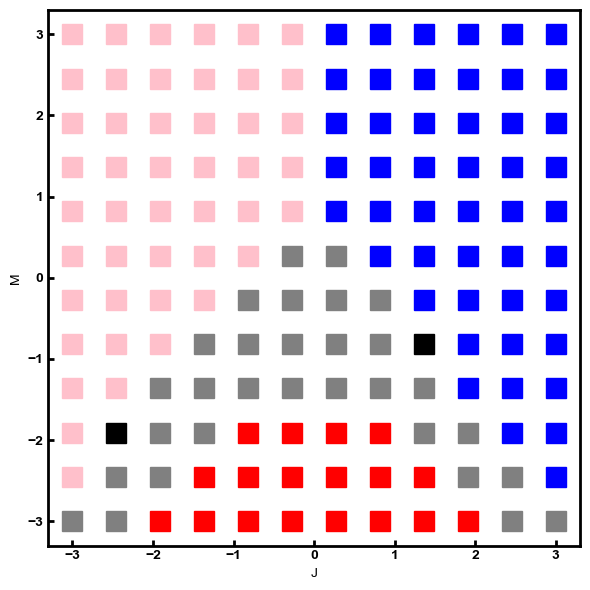

In [108]:
# Plot the results
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=100)
fig.set_facecolor("white")
plt.rc(group="font", family="Arial", weight="bold", size=10)
plt.rc(group="lines", linewidth=1)
plt.rc(group="axes", linewidth=2)

cdic = {"D_Phase":"grey",
        "A_Phase":"blue",
        "B_Phase":"red",
        "C_Phase":"pink",
        
        "X_Phase":"black",
        "U_Phase":"yellow"}

ms = 14
if D_Phase: ax.plot(np.array(D_Phase)[:,0], np.array(D_Phase)[:,1], ls="", marker="s", mfc=cdic["D_Phase"], mec=cdic["D_Phase"], ms=ms, alpha=1)
if A_Phase: ax.plot(np.array(A_Phase)[:,0], np.array(A_Phase)[:,1], ls="", marker="s", mfc=cdic["A_Phase"], mec=cdic["A_Phase"], ms=ms, alpha=1)
if B_Phase: ax.plot(np.array(B_Phase)[:,0], np.array(B_Phase)[:,1], ls="", marker="s", mfc=cdic["B_Phase"], mec=cdic["B_Phase"], ms=ms, alpha=1)
if C_Phase: ax.plot(np.array(C_Phase)[:,0], np.array(C_Phase)[:,1], ls="", marker="s", mfc=cdic["C_Phase"], mec=cdic["C_Phase"], ms=ms, alpha=1)
if X_Phase: ax.plot(np.array(X_Phase)[:,0], np.array(X_Phase)[:,1], ls="", marker="s", mfc=cdic["X_Phase"], mec=cdic["X_Phase"], ms=ms, alpha=1)
if U_Phase: ax.plot(np.array(U_Phase)[:,0], np.array(U_Phase)[:,1], ls="", marker="s", mfc=cdic["U_Phase"], mec=cdic["U_Phase"], ms=ms, alpha=1)

ax.set_xlabel("J")
ax.set_ylabel("M")
ax.tick_params(axis="both", direction="in", width=2, length=4)
fig.tight_layout()
plt.show()

# 1/J vs 1/M

In [39]:
# Precision
mp.dps = 50

  0%|          | 0/11 [00:00<?, ?it/s]/var/folders/56/k5k1hn6s4pd9x__t6s6fpclr0000gn/T/ipykernel_21326/1514216635.py:94: RuntimeWarning: divide by zero encountered in scalar divide
  M = 1 / inv_M
/Users/artun/Documents/Research/PhD Research/Projects/Continous Ashkin-Teller/ashkin-teller/renormalization.py:38: RuntimeWarning: invalid value encountered in multiply
  integrand = u * np.exp(-1j*(n*THETA + m*PHI))
/Users/artun/anaconda3/envs/continous-ashkin-teller/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/artun/Documents/Research/PhD Research/Projects/Continous Ashkin-Teller/ashkin-teller/renormalization.py:41: RuntimeWarning: invalid value encountered in scalar multiply
  lambda_nm[n_idx, m_idx] = np.sum(integrand) * dtheta * dphi / (4*np.pi**2)
/Users/artun/Documents/Research/PhD Research/Projects/Continous Ashkin-Teller/ashkin-teller/renormalization.py:

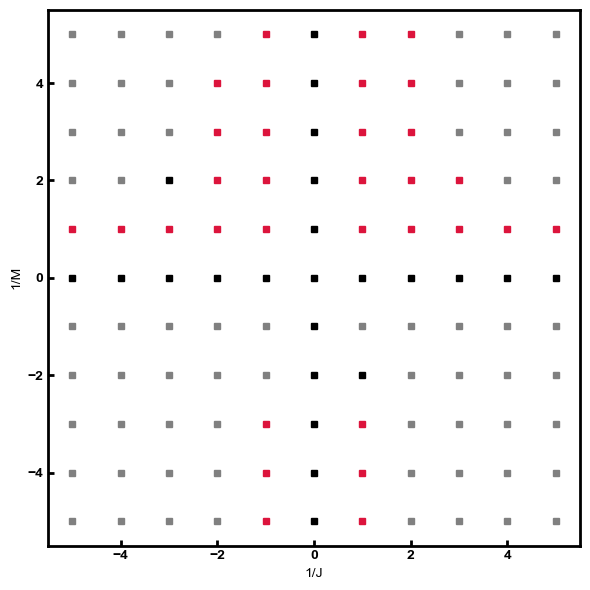

In [27]:
n_points = 11
inv_J_values = np.linspace(start=-5, stop=5, num=n_points)
inv_M_values = np.linspace(start=-5, stop=5, num=n_points)

Disordered, A_Phase, B_Phase, X_Phase, undetermined = generate_phase_diagram_inverse(
    inv_J_values,
    inv_M_values,
    n_max = 5,
    b = 3,
    d = 2)

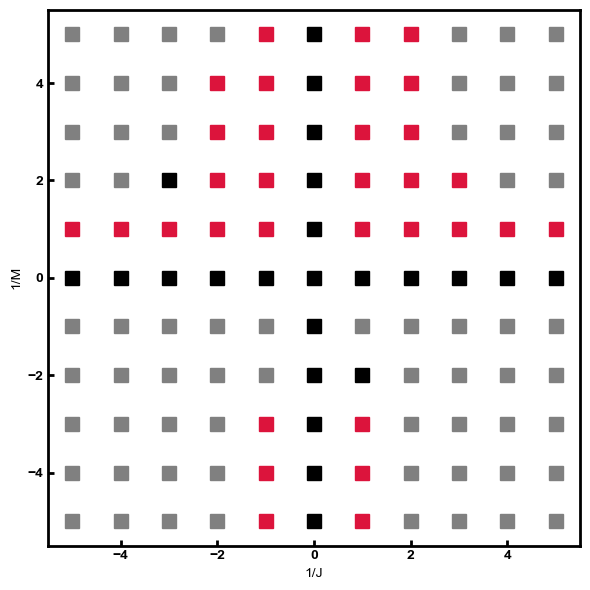

In [33]:
# Plot the results
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=100)
fig.set_facecolor("white")
plt.rc(group="font", family="Arial", weight="bold", size=10)
plt.rc(group="lines", linewidth=1)
plt.rc(group="axes", linewidth=2)

cdic = {"Disordered":"grey",
        "A_Phase":"dodgerblue",
        "B_Phase":"crimson",
        
        "X_Phase":"black",
        "undetermined":"yellow"}

ms = 10
if Disordered: ax.plot(np.array(Disordered)[:,0], np.array(Disordered)[:,1], ls="", marker="s", mfc=cdic["Disordered"], mec=cdic["Disordered"], ms=ms, alpha=1)
if A_Phase: ax.plot(np.array(A_Phase)[:,0], np.array(A_Phase)[:,1], ls="", marker="s", mfc=cdic["A_Phase"], mec=cdic["A_Phase"], ms=ms, alpha=1)
if B_Phase: ax.plot(np.array(B_Phase)[:,0], np.array(B_Phase)[:,1], ls="", marker="s", mfc=cdic["B_Phase"], mec=cdic["B_Phase"], ms=ms, alpha=1)
if X_Phase: ax.plot(np.array(X_Phase)[:,0], np.array(X_Phase)[:,1], ls="", marker="s", mfc=cdic["X_Phase"], mec=cdic["X_Phase"], ms=ms, alpha=1)
if undetermined: ax.plot(np.array(undetermined)[:,0], np.array(undetermined)[:,1], ls="", marker="s", mfc=cdic["undetermined"], mec=cdic["undetermined"], ms=ms, alpha=1)

ax.set_xlabel("1/J")
ax.set_ylabel("1/M")
ax.tick_params(axis="both", direction="in", width=2, length=4)
fig.tight_layout()
plt.show()